# Variational principle
Code implementing the variational principle for a 1D potential.
To try different things, change:
- the potential function V
- the wavefunction psi
- the initial guess of the wavefunction parameters aguess

In [18]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from numdifftools import Derivative

In [19]:
xmin = -10.0; xmax = 10.0 #limits of integration, may be np.inf (infinity)
hbar = 1.0; mass = 1.0; omega=1.0 # some constants.  Changing mass will also change the energy scale.
alpha = 0.1

In [20]:
def V(x):
    # this example is the harmonic oscillator
    # make sure this function is "vectorizable" and does not have any division by zero
    return mass*(omega**2+alpha**2)*x**2/2

In [21]:
def psi(x,beta):
    '''Wavefunction as a function of position x.
    beta is the variational parameter'''
    # Note, normalization is not necessary
    return np.exp(-beta*x**2)

In [22]:
betaguess = 0.5 # guess of the arguments that minimize the wavefunction

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# for plotting only, 
xlist = np.linspace(xmin, xmax, 101)
ylist = [V(x) for x in xlist]
psilist = [psi(x,betaguess) for x in xlist]

In [28]:
def Hpsi(x,beta):
    '''The Hamiltonian acting on psi at point x'''
    d2psi = Derivative(lambda x: psi(x,beta), n=2)
    return -0.5*hbar**2/mass *d2psi(x) + V(x)*psi(x,beta)

In [29]:
def EVH(beta, psi):
    '''Expectation value of the Hamiltonian for wavefunction psi that has the argument beta
    psi is a function of x and beta
    beta is a parameter for the wavefunction'''
    # Calculate normalization of psi
    norm = quad(lambda x, a:np.abs(psi(x,beta))**2, xmin, xmax, args=(beta,))[0]
    ev = quad(lambda x, a:np.conj(psi(x,beta))*Hpsi(x,a), xmin, xmax, args=(beta,))[0]
    return ev/norm

In [30]:
output = minimize(EVH, betaguess, args=(psi,))
outlist = [psi(x,output.x) for x in xlist]

In [31]:
problist = [np.abs(psi(x,output.x))**2 for x in xlist]


In [32]:
print(f"Minimum energy = {output.fun:#.3g} for beta = {output.x[0]:#.3g}")

Minimum energy = 0.502 for beta = 0.502


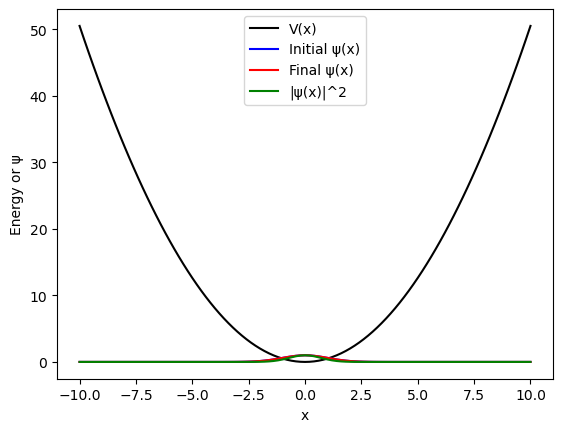

In [33]:
plt.plot(xlist,ylist,'k-', label = "V(x)")
plt.plot(xlist,psilist,'b-', label = "Initial ψ(x)")
plt.plot(xlist,outlist,'r-', label = "Final ψ(x)")
plt.plot(xlist,problist, 'g-', label = "|ψ(x)|^2")
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ψ");